## Cooling of a superheated water vapor at constant pressure
Given:
- $T_1 = 600^\circ$C
- $p_1 = 5$ MPa.

You cool the superheated vapor at constant pressure until it becomes a saturated vapor, $x_2 = 1$.

Determine: 
- $p_2$
- $T_2$
- $T_2$ assuming that it is an ideal gas and not water vapor. Assume that $v_\text{2,water} = v_\text{2,idealgas}$

In [19]:
T1_C = 600
p1_kPa = 5000

# conversion 
p1_MPa = p1_kPa/1000
T1_K = T1_C + 273.15

### Solution
We can use the property tables in the book to determine the answers or we can use "digital" tables. Here we will use the digital tables. 

In [29]:
# !pip install iapws
try:
    from iapws import IAPWS97
except ImportError:
    !pip install iapws
    from iapws import IAPWS97

In [31]:
# pressure should be in the units MPa, 
# temperature in the units K, 
# quality a number betwee 0 and 1. 
water_1 = IAPWS97(P=p1_MPa, T=T1_K)

In [32]:
s1 = water_1.s # kJ/kg*K
h1 = water_1.h # kJ/kg
v1 = water_1.v # m3/kg
u1 = water_1.u # kJ/kg

In [33]:
print('The specific entropy is: {0:1.4f} kJ/kg*K'.format(s1))
print('The specific enthalpy is: {0:1.4f} kJ/kg'.format(h1))
print('The specific volume is: {0:1.4f} m3/kg'.format(v1))
print('The specific internal energy is: {0:1.4f} kJ/kg'.format(u1))

The specific entropy is: 7.2604 kJ/kg*K
The specific enthalpy is: 3666.8311 kJ/kg
The specific volume is: 0.0787 m3/kg
The specific internal energy is: 3273.3176 kJ/kg


We can now determine the properties of state 2. Since we are told that the pressure is constant, we know that $p_1 = p_2$. With this information and knowledge about the $x_2 =1$, we have complete information about the second state:

In [34]:
p2_MPa = p1_MPa
x2 = 1;
water_2 = IAPWS97(P=p2_MPa, x=x2)

In [35]:
s2 = water_2.s # kJ/kg*K
h2 = water_2.h # kJ/kg
v2 = water_2.v # m3/kg
u2 = water_2.u # kJ/kg
T2 = water_2.T # kJ/kg

In [36]:
print('The specific entropy is: {0:1.4f} kJ/kg*K'.format(s2))
print('The specific enthalpy is: {0:1.4f} kJ/kg'.format(h2))
print('The specific volume is: {0:1.4f} m3/kg'.format(v2))
print('The specific internal energy is: {0:1.4f} kJ/kg'.format(u2))
print('The temperature is: {0:1.4f} K'.format(T2))

The specific entropy is: 5.9737 kJ/kg*K
The specific enthalpy is: 2794.2271 kJ/kg
The specific volume is: 0.0394 m3/kg
The specific internal energy is: 2596.9957 kJ/kg
The temperature is: 537.0929 K


So now we know $T_2$ and $p_2$. It is instructive to plot this process on $T-v$ and $p-v$ diagrams.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

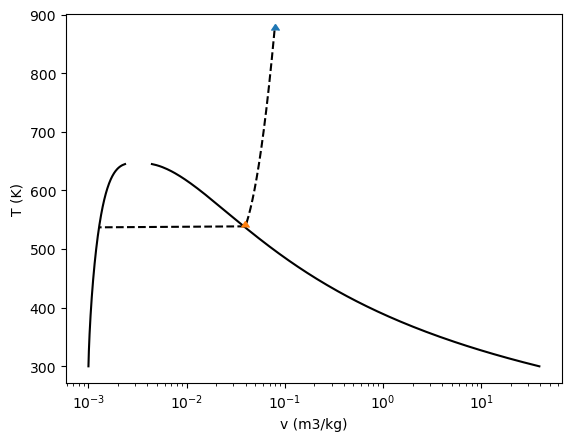

In [38]:
plt.figure()
plt.clf()
T = np.linspace(T1_K, T2, 200) # range of temperatures
for P in [p1_MPa]: #MPa
    steam = [IAPWS97(T=t, P=P) for t in T]
    S = [s.s for s in steam]
    v = [s.v for s in steam]
    # plt.plot(S, T, 'k--')
    plt.xscale("log")
    plt.plot(v, T, 'k--')

T = np.linspace(300, 645, 200) # range of temperatures
vvap = [s.v for s in [IAPWS97(T=t, x=1) for t in T]]
vliq = [s.v for s in [IAPWS97(T=t, x=0) for t in T]]

#plt.plot(svap, T, 'k-')
#plt.plot(sliq, T, 'k-')
plt.xscale("log")
plt.plot(vvap, T, 'k-')
plt.xscale("log")
plt.plot(vliq, T, 'k-')

plt.xscale("log")
plt.plot(v1,T1_K, marker = 10)
plt.plot(v2,T2, marker = 10)

plt.xlabel('v (m3/kg)')
plt.ylabel('T (K)')
plt.savefig('iawps-steam-T-v-diagram.png')

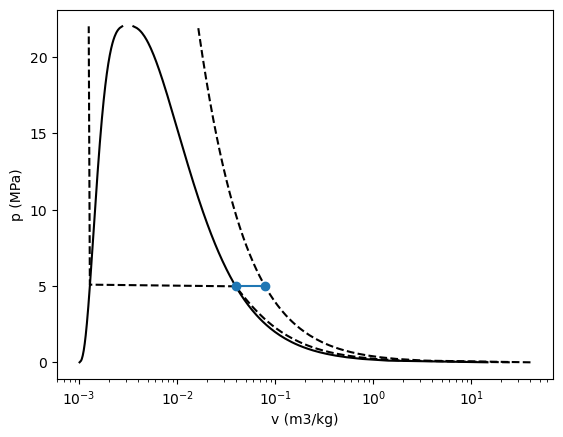

In [39]:
plt.figure()
plt.clf()
P = np.linspace(0.01, 22, 200) # range of pressures
for T in [T1_K, T2]: #K
    steam = [IAPWS97(T=T, P=p) for p in P]
    S = [s.s for s in steam]
    v = [s.v for s in steam]
    # plt.plot(S, T, 'k--')
    plt.xscale("log")
    plt.plot(v, P, 'k--')

vvap = [s.v for s in [IAPWS97(P=p, x=1) for p in P]]
vliq = [s.v for s in [IAPWS97(P=p, x=0) for p in P]]

plt.plot(vvap, P, 'k-')
plt.plot(vliq, P, 'k-')

plt.xscale("log")
x1, y1 = [v1, v2], [p1_MPa, p2_MPa]
plt.plot(x1, y1, marker = 'o')

plt.xlabel('v (m3/kg)')
plt.ylabel('p (MPa)')
plt.savefig('iawps-steam-p-v-diagram.png')

We can compare this answer with what we would get with an ideal gas:
$p_1 = p_2$

Ideal gas equation:

$p_2 \bar{v}_2 = R T_\text{2,idealgas}$

$\implies T_\text{2,idealgas} = p_2 \bar{v}_2/R $



In [40]:
p2_Pa = p2_MPa*1e6; 
R = 8.3144598; # J⋅mol^−1⋅K^−1
M = 0.0180153; # kg / mol
v2_m3perMol = v2*M

T2_idealGas_K = (p2_Pa*v2_m3perMol)/R
print('T2_idealGas is: {0:1.4f} K'.format(T2_idealGas_K))

T2_idealGas is: 427.3497 K


Compare this result with what we had above when using the water property database. The error is significant.